# Neural Network Regression with Tensorflow

There are many definitions for a regression problem,  but in our case we are going to simplify it:  prediciting a numerical bvariable based on some other combination of variables.

In [1]:
# import tensorflow
import tensorflow as tf
print(tf.__version__)

2.9.2


## Create data to view and fit

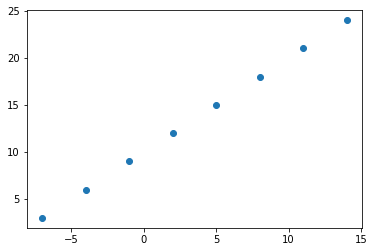

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

#create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#visualise it
plt.scatter(X, y)

## Input and output shapes

In [3]:
# create a demo tensor for our housing price prediction problem

house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([250000])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([250000], dtype=int32)>)

In [4]:
input_shape = X.shape
output_shape = y.shape

input_shape, output_shape

((8,), (8,))

In [5]:
X[0], y[0]

(-7.0, 3.0)

In [6]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

((), ())

In [7]:
X[0].ndim

0

In [8]:
# turn our numpy arrasy into tensors

X = tf.constant(X)
y = tf.constant(y)

In [9]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [10]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in modelling with tensorflow

- Creating a model - define the input and output layers as well as the hidden layers of a deep learning model
- Compling a model - define the loss function, optimizer and evaluation metrics
- Fitting a model - letting the model try to find patterns between X and y (features and labels)

In [11]:
# set a random seed

tf.random.set_seed(42)

# 1. Create a model using Sequential API
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))


# 2. Compile the model 
model.compile(loss = tf.keras.losses.mae, 
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 610ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 10.9748 - mae: 10.9748


In [12]:
# try and make a prediction with the model

y_pred = model.predict([17.0])

1/1 [==============================] - 0s 95ms/step


In [13]:
y_pred + 11

array([[23.71602]], dtype=float32)

## Improving the model

We can improve the model by altering the steps we took to create a model. 

- Create:  maybe add more layers, increase the neurons and perhaps change the activation functions of each player
- Compile: here we might change the optimization function,  or perhaps the learning rate of the optimizer 
- Fitting: here we might fit a model for more epochs or on more data. 

In [14]:
# let's rebuild the model and first,  increase the epochs
# set a random seed

tf.random.set_seed(42)

# 1. Create a model using Sequential API
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))


# 2. Compile the model 
model.compile(loss = tf.keras.losses.mae, 
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 317ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/100
1/1 [==============================] - 

In [15]:
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 248ms/step


array([[30.158512]], dtype=float32)

In [16]:
# let's rebuild the model and first
# increase layer units & activation
# set a random seed

tf.random.set_seed(42)

# 1. Create a model using Sequential API
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(1))


# 2. Compile the model 
model.compile(loss = tf.keras.losses.mae, 
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 691ms/step - loss: 12.3185 - mae: 12.3185
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 11.7696 - mae: 11.7696
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 11.2132 - mae: 11.2132
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 10.6444 - mae: 10.6444
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 10.0534 - mae: 10.0534
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 9.4344 - mae: 9.4344
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 8.7821 - mae: 8.7821
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 8.0881 - mae: 8.0881
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 7.3552 - mae: 7.3552
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 6.5787 - mae: 6.5787
Epoch 11/100
1/1 [==============================] - 0s 17ms/ste

In [17]:
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 256ms/step


array([[31.382648]], dtype=float32)

In [18]:
# it looks like the model is overfitting in this instance! 
# let's rebuild the model
# lets reduce the neurons and turn off activation
# change optimizer to Adam
# set a random seed

tf.random.set_seed(42)

# 1. Create a model using Sequential API
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, activation=None))
model.add(tf.keras.layers.Dense(1))


# 2. Compile the model 
model.compile(loss = tf.keras.losses.mae, 
              optimizer = tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
1/1 [==============================] - 1s 629ms/step - loss: 13.1820 - mae: 13.1820
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 12.5071 - mae: 12.5071
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 11.8279 - mae: 11.8279
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 11.1425 - mae: 11.1425
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 10.4485 - mae: 10.4485
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 9.7427 - mae: 9.7427
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 9.0218 - mae: 9.0218
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 8.2826 - mae: 8.2826
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 7.5221 - mae: 7.5221
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 6.7841 - mae: 6.7841
Epoch 11/100
1/1 [==============================] - 0s 11ms/s

In [19]:
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 212ms/step


array([[27.216784]], dtype=float32)

## Evaluating a model

We managed to improve our model with a few minor adjustments.  Now it's time to evaluate the model.

In practice, a typical workflow we will go trhough when building a neural network is:

**Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it etc.**

When it comes to evaluation there are 3 words you should memorise. Visualise, Visualise, Visualise. 

It's a good idea to visalise:
- data:  what data are we working with?
- model:  what does our model look like?
- training:  how does a model perform while it learns?
- predictions:  how do the predictions of a model line up against the ground truth (original labels)



In [20]:
# make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [21]:
# make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

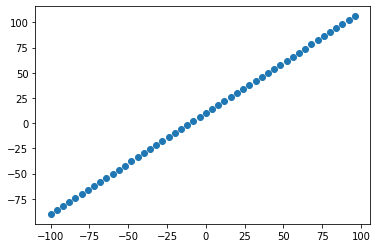

In [22]:
# visualise the data
import matplotlib.pyplot as plt

plt.scatter(X,y)

## The 3 sets.. 

- training data: the  model learns from this data, typically 70-80% of the total data available
- validation data: the model gets tuned on this data, typically 10-15%
- test data: the model gets evaluated on this data to test it had learned, typically 10-15%


In [23]:
# check the length of samples
len(X)

50

In [24]:
# skip the validation for now due to small dataset
# split the data into train and tests

X_train = X[:40] # first 40 training
y_train = y[:40]
X_test = X[40:] # last 10 
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

## Visualising the data

Now we have the data in the train & test sets,  lets visualise it again! 

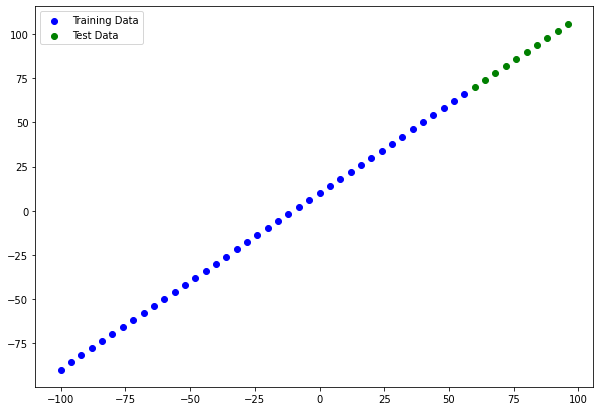

In [25]:
plt.figure(figsize=(10,7))
# plot the training data in blue
plt.scatter(X_train, y_train, c="b", label="Training Data")
# plot the testing data in green
plt.scatter(X_test, y_test, c="g", label="Test Data")
# show legend
plt.legend();

In [26]:
# lets build the neural network for our data
# it is built automatically using the input_shape

# set a random seed

tf.random.set_seed(42)

# 1. Create a model using Sequential API
model = tf.keras.Sequential(name="one_of_many")
model.add(tf.keras.layers.Dense(50, input_shape = [1], name="input_layer"))
model.add(tf.keras.layers.Dense(50, input_shape = [1], name="input_layer2"))
model.add(tf.keras.layers.Dense(1, name="output_layer"))


# 2. Compile the model 
model.compile(loss = tf.keras.losses.mae, 
              optimizer = tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])



## Visualise the model

In [27]:
model.summary()

Model: "one_of_many"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 50)                100       
                                                                 
 input_layer2 (Dense)        (None, 50)                2550      
                                                                 
 output_layer (Dense)        (None, 1)                 51        
                                                                 
Total params: 2,701
Trainable params: 2,701
Non-trainable params: 0
_________________________________________________________________


- Total params: the total number of parameters in the model (how many different patterns the model can learn)
- Trainable parameters: the parameters the model can update as it trains 
- Non-trainable params:  these params aren't updated during training (this is typical when you bring in already learned patterns or params from other models during transfer learning.)


In [28]:
# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose = 0)

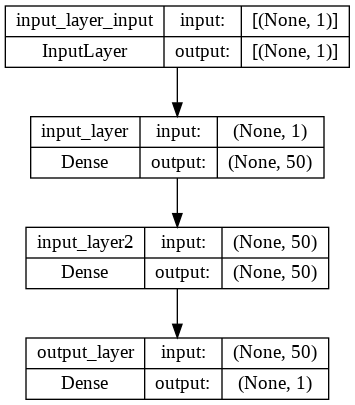

In [29]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

## Visualising the model predictions

To visualise the predictions, it's a good idea to plot them against the ground truth labels. 

Often you'#ll see this in the form of 'y_test' or 'y_true' verses 'y_pred'

In [30]:
# make some predictions

y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 64ms/step


array([[ 70.5258  ],
       [ 74.567055],
       [ 78.6083  ],
       [ 82.64954 ],
       [ 86.690796],
       [ 90.73204 ],
       [ 94.773285],
       [ 98.81454 ],
       [102.855774],
       [106.89704 ]], dtype=float32)

In [31]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [32]:
# create a plotting function for later use
def plot_results(training_data=X_train, 
                 training_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred):
  """
  Plots training data, tests data and compares predictions to ground truth
  """
  plt.figure(figsize=(10,7))
  plt.scatter(training_data, training_labels, c="b", label="Training Data")
  plt.scatter(test_data, test_labels, c="g", label="Testing Data")
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  plt.legend();
  

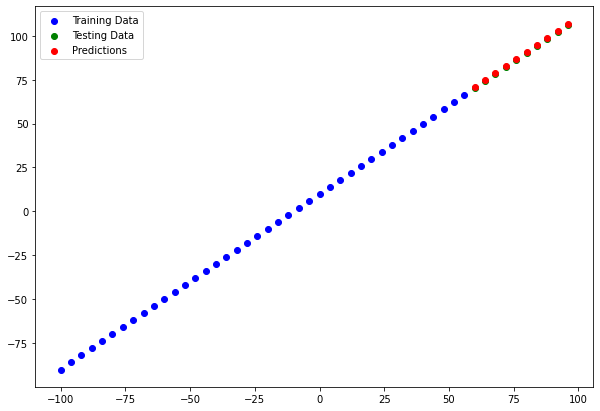

In [33]:
plot_results()

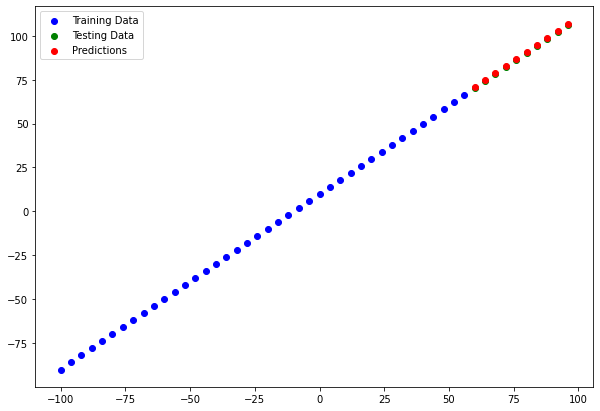

In [34]:
plot_results(training_data=X_train, 
                 training_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

## Evaluating our models predictions

Depending on the problem you're working on , there will be different evaluation metrics to evaluate your models performance.

Since we are working on a regression,  two of the main metrics:
- MAE: mean absolute error "on average how wrong is each of my models predictions."
- MSE: mean squared error "square the average errors"

In [35]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 166ms/step - loss: 0.7114 - mae: 0.7114


[0.7114158868789673, 0.7114158868789673]

In [36]:
# calculate the mean absolute error (mathematically)
result_mae = tf.metrics.mean_absolute_error(y_test, y_pred)
result_mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.579357, 14.459767, 12.15668 , 10.670092, 10.      , 10.146408,
       11.109314, 12.888722, 15.484619, 18.897041], dtype=float32)>

In [37]:
# calculate the mean absolute error by making tensors same shape
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.7114174>

In [38]:
# calculate the mean square error by making tensors same shape
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=0.5201509>

In [39]:
# functionise for the metrics
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))
def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=tf.squeeze(y_pred))

## Run experiments to improve our model

1. Get more data: more opps to learn patterns
2. Make the model larger (adding complexity) this might come in the form of more layers or more units
3. Train for longer - give model more of a chance to find patterns in data

Modelling experiments:
1. model_1 = same as the original
2. model_2 = two layers trained for 100 
3. model_3 = two layers for 500 epochs

In [40]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [41]:
# set random seed

tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential()
model_1.add(tf.keras.layers.Dense(1))

# 2. Compile the model 
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 19.0311 - mae: 19.0311
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 10.8111 - mae: 10.8111
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 14.5005 - mae: 14.5005
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 10.0958 - mae: 10.0958
Epoch 5/100
2/2 [==============================] - 0s 10ms/step - loss: 15.5388 - mae: 15.5388
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 11.8626 - mae: 11.8626
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 9.1727 - mae: 9.1727
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 13.6143 - mae: 13.6143
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 13.8577 - mae: 13.8577
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 9.9966 - mae: 9.9966
Epoch 11/100
2/2 [==============================] - 0s 9ms/st

1/1 [==============================] - 0s 152ms/step


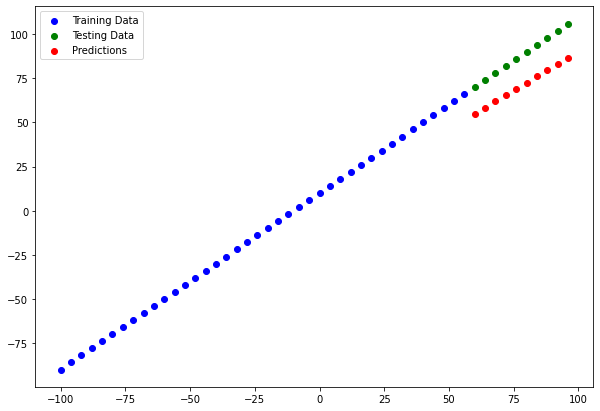

In [42]:
y_preds_1 = model_1.predict(X_test)
plot_results(predictions=y_preds_1)

In [43]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)

mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=17.27238>,
 <tf.Tensor: shape=(), dtype=float32, numpy=300.0371>)

In [44]:
# set random seed

tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential()
model_2.add(tf.keras.layers.Dense(100))
model_2.add(tf.keras.layers.Dense(1))

# 2. Compile the model 
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_2.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 49.3045 - mae: 49.3045
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 29.7944 - mae: 29.7944
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 47.3696 - mae: 47.3696
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 9.1203 - mae: 9.1203
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 11.9354 - mae: 11.9354
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 30.0167 - mae: 30.0167
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 26.6603 - mae: 26.6603
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 10.7395 - mae: 10.7395
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 9.9917 - mae: 9.9917
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1285 - mae: 10.1285
Epoch 11/100
2/2 [==============================] - 0s 5ms/step

1/1 [==============================] - 0s 161ms/step


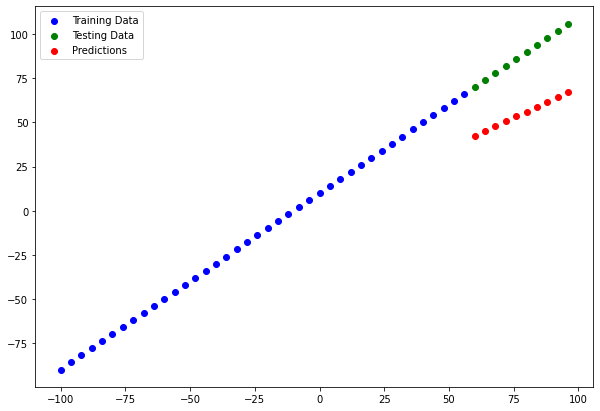

In [45]:
y_preds_2 = model_2.predict(X_test)
plot_results(predictions=y_preds_2)

In [46]:
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)

mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=33.19091>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1114.8477>)

In [47]:
# set random seed

tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential()
model_3.add(tf.keras.layers.Dense(100))
model_3.add(tf.keras.layers.Dense(100))
model_3.add(tf.keras.layers.Dense(1))

# 2. Compile the model 
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X, axis=-1), y, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 9ms/step - loss: 46.4888 - mae: 46.4888
Epoch 2/500
2/2 [==============================] - 0s 10ms/step - loss: 15.3434 - mae: 15.3434
Epoch 3/500
2/2 [==============================] - 0s 10ms/step - loss: 28.6591 - mae: 28.6591
Epoch 4/500
2/2 [==============================] - 0s 8ms/step - loss: 18.3257 - mae: 18.3257
Epoch 5/500
2/2 [==============================] - 0s 7ms/step - loss: 13.9304 - mae: 13.9304
Epoch 6/500
2/2 [==============================] - 0s 11ms/step - loss: 12.5135 - mae: 12.5135
Epoch 7/500
2/2 [==============================] - 0s 7ms/step - loss: 9.7662 - mae: 9.7662
Epoch 8/500
2/2 [==============================] - 0s 6ms/step - loss: 11.5801 - mae: 11.5801
Epoch 9/500
2/2 [==============================] - 0s 7ms/step - loss: 7.7169 - mae: 7.7169
Epoch 10/500
2/2 [==============================] - 0s 7ms/step - loss: 9.1008 - mae: 9.1008
Epoch 11/500
2/2 [==============================] - 0s 10ms/st

1/1 [==============================] - 0s 200ms/step


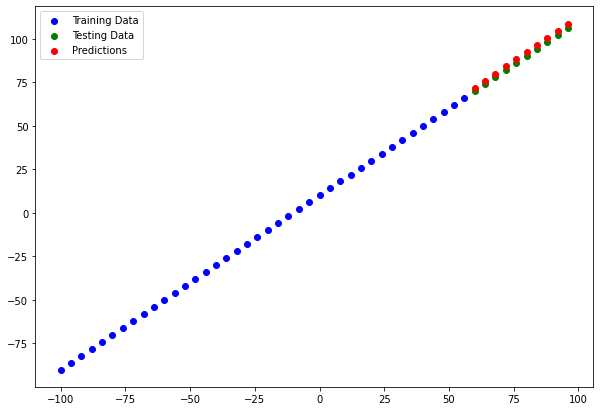

In [48]:
y_preds_3 = model_3.predict(X_test)
plot_results(predictions=y_preds_3)

In [49]:
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)

mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=2.23619>,
 <tf.Tensor: shape=(), dtype=float32, numpy=5.089348>)

## Comparing Experiments

In [50]:
# create a data frame of results

import pandas as pd

model_results  = [["model_1", mae_1.numpy(), mse_1.numpy()], 
                  ["model_2", mae_2.numpy(), mse_2.numpy()], 
                  ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,17.272381,300.037109
1,model_2,33.190910,1114.847656
2,model_3,2.236190,5.089348


In [51]:
model_3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 100)               200       
                                                                 
 dense_10 (Dense)            (None, 100)               10100     
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
                                                                 
Total params: 10,401
Trainable params: 10,401
Non-trainable params: 0
_________________________________________________________________


One of the main goals is to minimise the time between experiments, the more you experiment the more you realise what doesn't work thus getting you closer to what does work. 

## Tracking your experiments

One really good habit in mavhine learning modelling is to track the results of your experiments. 

There are tools to help us: 
- TensorBoard:   a component of the TF library to help track modelling experiments (we'll see this one later)
- Weights & Biases - a tool for tracking all sorts of machine learning experiments (plugs in to TensorBoard)


## Saving our Models

Saving our models allows us to use them outside wherever they were trained.  We can use them in a webapp or mobile app for example. 

- We can save as SavedModel
- We can save in the HDF5 format

In [52]:
model_3.save("model_3_savemodel_format")

In [53]:
model_3.save("model_3_format.hdf5")

## Load model

In [54]:
model_load = tf.keras.models.load_model("/content/model_3_savemodel_format")

In [55]:
model_load.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 100)               200       
                                                                 
 dense_10 (Dense)            (None, 100)               10100     
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
                                                                 
Total params: 10,401
Trainable params: 10,401
Non-trainable params: 0
_________________________________________________________________


In [56]:
model_load_2 = tf.keras.models.load_model("model_3_format.hdf5")

In [57]:
model_load_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 100)               200       
                                                                 
 dense_10 (Dense)            (None, 100)               10100     
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
                                                                 
Total params: 10,401
Trainable params: 10,401
Non-trainable params: 0
_________________________________________________________________


# A model with a more rich data



In [58]:
data = pd.read_csv("insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [59]:
data_encoded = pd.get_dummies(data)
data_encoded

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [60]:
X = data_encoded.drop("charges", axis=1)
y = data_encoded["charges"]

In [61]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [62]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15,
                                                    random_state=42)

In [64]:
# build the model

tf.random.set_seed(42)

#1. Create model

insurance_model = tf.keras.Sequential()
insurance_model.add(tf.keras.layers.Dense(10))
insurance_model.add(tf.keras.layers.Dense(1))

# 2. compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
36/36 [==============================] - 1s 4ms/step - loss: 8615.8477 - mae: 8615.8477
Epoch 2/100
36/36 [==============================] - 0s 3ms/step - loss: 7424.6216 - mae: 7424.6216
Epoch 3/100
36/36 [==============================] - 0s 3ms/step - loss: 7409.3569 - mae: 7409.3569
Epoch 4/100
36/36 [==============================] - 0s 3ms/step - loss: 7796.7231 - mae: 7796.7231
Epoch 5/100
36/36 [==============================] - 0s 3ms/step - loss: 7631.7573 - mae: 7631.7573
Epoch 6/100
36/36 [==============================] - 0s 3ms/step - loss: 7724.1274 - mae: 7724.1274
Epoch 7/100
36/36 [==============================] - 0s 3ms/step - loss: 7702.0142 - mae: 7702.0142
Epoch 8/100
36/36 [==============================] - 0s 3ms/step - loss: 7795.1406 - mae: 7795.1406
Epoch 9/100
36/36 [==============================] - 0s 3ms/step - loss: 7661.1538 - mae: 7661.1538
Epoch 10/100
36/36 [==============================] - 0s 3ms/step - loss: 7557.9092 - mae: 7557.9092

In [65]:
# check the results of the insurance model on the test data

insurance_model.evaluate(X_test, y_test)


7/7 [==============================] - 0s 3ms/step - loss: 5897.1733 - mae: 5897.1733


[5897.17333984375, 5897.17333984375]

In [66]:
# lets try and improve the model

# build the model

tf.random.set_seed(42)

#1. Create model

insurance_model_2 = tf.keras.Sequential()
insurance_model_2.add(tf.keras.layers.Dense(100))
insurance_model_2.add(tf.keras.layers.Dropout(0.2))
insurance_model_2.add(tf.keras.layers.Dense(50))
insurance_model_2.add(tf.keras.layers.Dense(1))

# 2. compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(lr=0.01),
                        metrics=["mae"])

# 3. Fit the model
history = insurance_model_2.fit(X_train, y_train, epochs=200)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


36/36 [==============================] - 1s 3ms/step - loss: 9879.7480 - mae: 9879.7480
Epoch 2/200
36/36 [==============================] - 0s 3ms/step - loss: 7326.1699 - mae: 7326.1699
Epoch 3/200
36/36 [==============================] - 0s 3ms/step - loss: 7032.1514 - mae: 7032.1514
Epoch 4/200
36/36 [==============================] - 0s 3ms/step - loss: 6693.3438 - mae: 6693.3438
Epoch 5/200
36/36 [==============================] - 0s 3ms/step - loss: 6429.5742 - mae: 6429.5742
Epoch 6/200
36/36 [==============================] - 0s 2ms/step - loss: 6240.0303 - mae: 6240.0303
Epoch 7/200
36/36 [==============================] - 0s 3ms/step - loss: 5984.0854 - mae: 5984.0854
Epoch 8/200
36/36 [==============================] - 0s 2ms/step - loss: 5600.0020 - mae: 5600.0020
Epoch 9/200
36/36 [==============================] - 0s 2ms/step - loss: 5010.4697 - mae: 5010.4697
Epoch 10/200
36/36 [==============================] - 0s 2ms/step - loss: 4006.2778 - mae: 4006.2778
Epoch 11/20

In [67]:
insurance_model_2.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 3189.3367 - mae: 3189.3367


[3189.336669921875, 3189.336669921875]

In [68]:
insurance_model_2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 100)               1200      
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_15 (Dense)            (None, 50)                5050      
                                                                 
 dense_16 (Dense)            (None, 1)                 51        
                                                                 
Total params: 6,301
Trainable params: 6,301
Non-trainable params: 0
_________________________________________________________________


Text(0.5, 0, 'epochs')

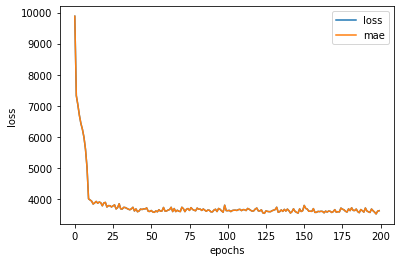

In [69]:
# history plot
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## Let's try some preprocessing

In terms in scaling values,  nerual networks tend to prefer normalisation. 



In [70]:
insurance_data = pd.read_csv("insurance.csv")

In [71]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# create column transformer

col_trans = make_column_transformer((MinMaxScaler(), ["age", "bmi", "children"]),
                                    (OneHotEncoder(handle_unknown="ignore"),
                                     ["sex", "smoker", "region"]))

X = insurance_data.drop("charges", axis=1)
y = insurance_data["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15,
                                                    random_state=42)

#fit the column transformer to our training data
col_trans.fit(X_train)

# transform training data and test data
X_train_normal = col_trans.transform(X_train)
X_test_normal = col_trans.transform(X_test)


In [72]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [73]:
X_train_normal

array([[0.73913043, 0.30669895, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.26086957, 0.76029056, 0.4       , ..., 0.        , 1.        ,
        0.        ],
       [0.02173913, 0.30414313, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [74]:
X_train.shape, X_train_normal.shape

((1137, 6), (1137, 11))

In [75]:
# build a network on our normalised data

# set the seed
tf.random.set_seed(42)

#create model using insurance model 3
insurance_model_3 = tf.keras.Sequential()
insurance_model_3.add(tf.keras.layers.Dense(100))
insurance_model_3.add(tf.keras.layers.Dropout(0.2))
insurance_model_3.add(tf.keras.layers.Dense(10))
insurance_model_3.add(tf.keras.layers.Dense(1))

# compile

insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(lr=0.01),
                          metrics=["mae"])

# fit
insurance_model_3.fit(X_train_normal, y_train, epochs=100)





Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


36/36 [==============================] - 1s 2ms/step - loss: 13135.8369 - mae: 13135.8369
Epoch 2/100
36/36 [==============================] - 0s 3ms/step - loss: 10995.0928 - mae: 10995.0928
Epoch 3/100
36/36 [==============================] - 0s 2ms/step - loss: 7966.0210 - mae: 7966.0210
Epoch 4/100
36/36 [==============================] - 0s 2ms/step - loss: 7512.0308 - mae: 7512.0308
Epoch 5/100
36/36 [==============================] - 0s 2ms/step - loss: 7008.6255 - mae: 7008.6255
Epoch 6/100
36/36 [==============================] - 0s 2ms/step - loss: 6333.8027 - mae: 6333.8027
Epoch 7/100
36/36 [==============================] - 0s 2ms/step - loss: 5252.7705 - mae: 5252.7705
Epoch 8/100
36/36 [==============================] - 0s 2ms/step - loss: 4194.5254 - mae: 4194.5254
Epoch 9/100
36/36 [==============================] - 0s 2ms/step - loss: 3760.3325 - mae: 3760.3325
Epoch 10/100
36/36 [==============================] - 0s 2ms/step - loss: 3656.3025 - mae: 3656.3025
Epoch 1

In [76]:
# evaluate insurance model 3 on normalised data

insurance_model_3.evaluate(X_test_normal, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 3179.0581 - mae: 3179.0581


[3179.05810546875, 3179.05810546875]